# Import des librairies

In [54]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# Récupération des données

In [55]:
data = pd.read_csv("data_imdb.csv")
print(data.head())
print(data.describe())

                                             reviews  cible
0  This movie is about human relationships. Charm...      1
1  In my line of work, I occasionally get contact...      1
2  Daniell Steel's Daddy, what a refreshing story...      1
3  I sat with my children as we watched this film...      1
4  Entertaining Jim Belushi vehicle, a modern coc...      1
              cible
count  50000.000000
mean       0.500000
std        0.500005
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000


In [56]:
data.isna().sum()

reviews    0
cible      0
dtype: int64

In [57]:
data.isnull().sum()

reviews    0
cible      0
dtype: int64

In [58]:
!pip install yellowbrick
from yellowbrick.target import ClassBalance

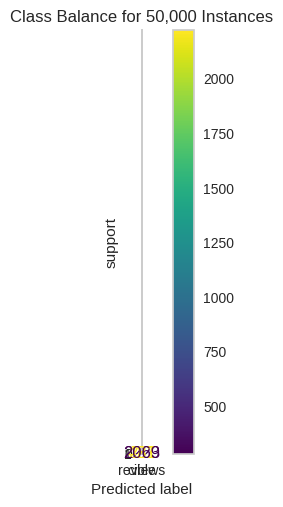

<AxesSubplot:title={'center':'Class Balance for 50,000 Instances'}, xlabel='Predicted label', ylabel='support'>

In [59]:
y = data['cible']

# Instantiate the visualizer
visualizer = ClassBalance(labels=["reviews", "cible"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# netoyage des données

In [60]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

data['reviews']=data['reviews'].apply(lambda x:remove_html(x))

In [61]:
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

data['reviews']=data['reviews'].apply(lambda x:remove_between_square_brackets(x))

# Découpage des données

In [62]:
X_train, X_test, y_train, y_test=train_test_split(data.reviews,data.cible,
                                                             test_size=0.1,random_state=42)

# Tests de différents algorithmes

In [ ]:
text_model = Pipeline([('count_vec', CountVectorizer()), 
                     ('tfidf_transformer', TfidfTransformer()),
                     ('text_model', SVC())])

text_model.fit(X_train, y_train)
y_pred = text_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [71]:
text_model_2 = Pipeline([('count_vec', CountVectorizer()), 
                     ('tfidf_transformer', TfidfTransformer()),
                     ('text_model', SGDClassifier(tol=None, loss='log'))])

text_model_2.fit(X_train, y_train)
y_pred = text_model_2.predict(X_test)
print(accuracy_score(y_test, y_pred))

/home/simplon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8736


/home/simplon/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


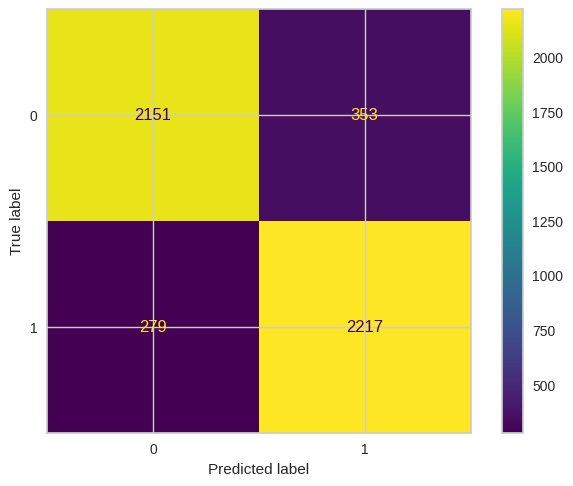

In [72]:
plot_confusion_matrix(text_model_2, X_test, y_test)
plt.show()

In [73]:
print(f1_score(y_test, y_pred))

0.875246742992499


In [74]:
print(recall_score(y_test, y_pred, average="micro"))

0.8736


In [67]:
text_model_3 = Pipeline([('count_vec', CountVectorizer()), 
                     ('tfidf_transformer', TfidfTransformer()),
                     ('text_model', BernoulliNB())])

text_model_3.fit(X_train, y_train)
y_pred = text_model_3.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.846


/home/simplon/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


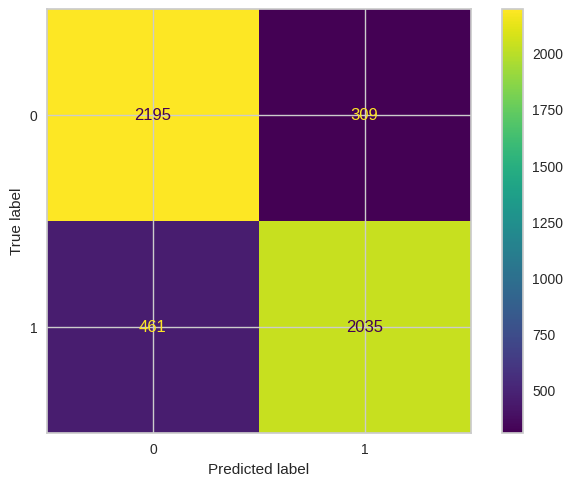

In [68]:
plot_confusion_matrix(text_model_3, X_test, y_test)
plt.show()

In [69]:
print(f1_score(y_test, y_pred))

0.8409090909090909


In [70]:
print(recall_score(y_test, y_pred, average="micro"))

0.846


In [63]:
text_model_4 = Pipeline([('count_vec', CountVectorizer()), 
                     ('tfidf_transformer', TfidfTransformer()),
                     ('text_model', MultinomialNB())])

text_model_4.fit(X_train, y_train)
y_pred = text_model_4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8584


/home/simplon/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


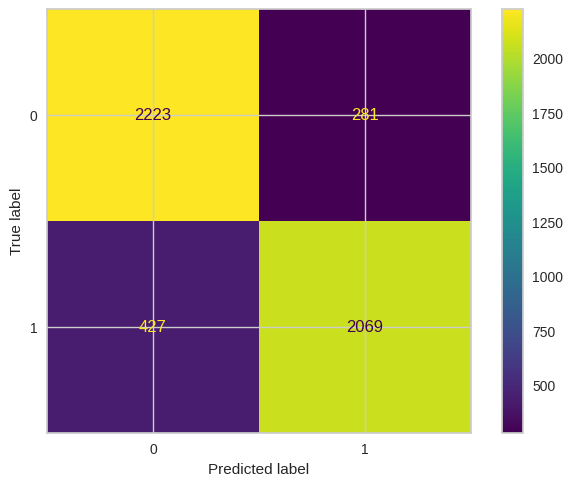

In [64]:
plot_confusion_matrix(text_model_4, X_test, y_test)
plt.show()

In [65]:
print(f1_score(y_test, y_pred))

0.8539001238134544


In [66]:
print(recall_score(y_test, y_pred, average="micro"))

0.8584


# Amélioration des hyper-paramètres avec GridSearch

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    "text_model__loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "text_model__alpha" : [0.0001, 0.001, 0.01, 0.1],
    "text_model__penalty" : ["l2", "l1", "none"],
}
SGD = SGDClassifier(max_iter=1000)
pipe = Pipeline([('count_vec', CountVectorizer()), ('tfidf_transformer', TfidfTransformer()),('text_model', SGD)])
                         
                         
clf = GridSearchCV(pipe, param_grid=params)

In [11]:
clf.fit(X_train, y_train)
print(clf.best_score_)

/home/simplon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/simplon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/simplon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/simplon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum num

0.9016


In [12]:
print(clf.best_estimator_)

Pipeline(steps=[('count_vec', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('text_model', SGDClassifier(loss='modified_huber'))])


In [13]:
text_model_2 = Pipeline([('count_vec', CountVectorizer()), 
                     ('tfidf_transformer', TfidfTransformer()),
                     ('text_model', SGDClassifier(tol=None, loss='modified_huber'))])

text_model_2.fit(X_train, y_train)
y_pred = text_model_2.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.903


In [31]:
test = ["Both the female characters very well played. Raima looks stunning and added glam factor to this series. Sakshi s character is very strong n pivotal ..however i found some part is really gory , well it's only because I can't handle it .."]

print(text_model_2.predict_proba(test)[0][1])
print(text_model_2.predict(test)[0])

1.0
1


In [14]:
import pickle
 
# Save the model under the cwd
pkl_filename = "model_analyse_sentiment_v2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(text_model_2, file)